In [1]:
import imp
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL.Image

### Get an image

In [2]:
def load_image(path, size):
    ret = PIL.Image.open(path)
    ret = ret.resize((size, size))
    ret = np.asarray(ret, dtype=np.uint8).astype(np.float32)
    if ret.ndim == 2:
        # Convert gray scale image to color channels.
        ret.resize((size, size, 1))
        ret = np.repeat(ret, 3, axis=-1)
    return ret

--2020-12-18 16:37:01--  http://farm4.static.flickr.com/3142/2592291184_71735af93e.jpg
Resolving farm4.static.flickr.com (farm4.static.flickr.com)... 13.32.201.87, 2600:9000:2015:1c00:0:5a51:64c9:c681, 2600:9000:2015:a400:0:5a51:64c9:c681, ...
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|13.32.201.87|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm4.static.flickr.com/3142/2592291184_71735af93e.jpg [following]
--2020-12-18 16:37:01--  https://farm4.static.flickr.com/3142/2592291184_71735af93e.jpg
Connecting to farm4.static.flickr.com (farm4.static.flickr.com)|13.32.201.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘n07720875_13.jpg’

n07720875_13.jpg        [ <=>                ]  49.53K  --.-KB/s    in 0.005s  

2020-12-18 16:37:01 (10.6 MB/s) - ‘n07720875_13.jpg’ saved [50719]



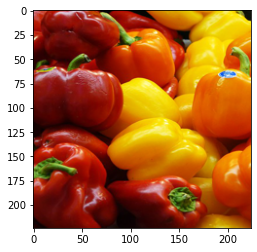

In [3]:
! wget http://farm4.static.flickr.com/3142/2592291184_71735af93e.jpg -O n07720875_13.jpg
image = load_image("n07720875_13.jpg", 224)
plt.imshow(image/255)

### Create a model with Keras and test Innvestigate following their example

In [4]:
import innvestigate
import innvestigate.utils
import keras.applications.vgg16 as vgg16

Using TensorFlow backend.
/homes/kpegion/.conda/envs/ensonn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/homes/kpegion/.conda/envs/ensonn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/homes/kpegion/.conda/envs/ensonn/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/homes/kpegion/.conda/e

In [5]:
# Get model
model, preprocess = vgg16.VGG16(), vgg16.preprocess_input

# Strip softmax layer
model = innvestigate.utils.model_wo_softmax(model)

In [6]:
# Create analyzer
analyzer = innvestigate.create_analyzer("deep_taylor", model)

# Add batch axis and preprocess
x = preprocess(image[None])

# Apply analyzer w.r.t. maximum activated output-neuron
a = analyzer.analyze(x)

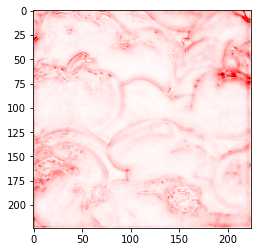

In [7]:
# Aggregate along color channels and normalize to [-1, 1]
a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
a /= np.max(np.abs(a))

# Plot
plt.imshow(a[0], cmap="seismic", clim=(-1, 1))